Digit Recognition using Pytorch [Google colab]

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt


1. import torch = PyTorch is the main deep learning library.
2. import torch.nn as nn = PyTorchs sub library to build neural network.
3. import torch.optim as optim = contains optimizers for adjusting weights for better performance.
4. from torchvision import datasets, transforms  
5. torchvision = PyTorchs image toolbox.
  * datasets = ready-made image datasets - MNIST digits
  * transforms = pre-processing tools (resize, normalize, convert to tensor) to prepare images.

6. from torch.utils.data import DataLoader = serves data to the model in small batches instead of all at once which is efficient.
7. from google.colab import files = For uploading/downloading files between computer and Colab notebook.
8. from PIL import Image = image processing library (open, resize, edit images).
9. import matplotlib.pyplot as plt = chart and image display tool, lets you visualize what’s happening.

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 32.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.01MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 8.04MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.25MB/s]


**preparing images befor giving it ot the model**

1. transform = transforms.Compose = performing the following steps
   * transforms.ToTensor() = changes the image from normal picture format to a PyTorch-friendly format ,a tensor. changes pixel number from 0-255to 0-1
   * transforms.Normalize((0.5,), (0.5,) = Adjusts numbers so they’re centered around 0 instead of all being positive, helps the model learn faster.

2. train_dataset/test_dataset = to get the MNIST dataset
   * root='./data'= Put the files in a folder named data in the current location.
   * train=True = learning data for the model
   * train=False = testing data to check how good the model is.
   * download=True = Download if not already there
   * transform=transform = Every image will be run through the steps we defined above before use

3. train_loader = DataLoader/test_loader = DataLoader
   = Take the dataset and give it to the model in small bactches.
   * batch_size=64 = 64 images at a time.
   * shuffle=True = Randomize training images every time so the model doesn’t just memorize the order.
   * shuffle=False = Keep test data in the same order so results are consistent

In [3]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super(DigitClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DigitClassifier()

1. class DigitClassifier(nn.Module): = Define a neural network class that inherits from PyTorch's nn.Module.
 * def __init__(self):  = Constructor method that runs when a new instance is created.
  * super(DigitClassifier, .. = Call the parent class constructor to initialize the module.
  * self.fc1 = nn.Linear(28*28, 128) = Create a fully connected layer mapping 784 inputs to 128 outputs.
  * self.. = nn.Linear(128, 64) = mapping 128 inputs to 64 outputs.
  * sel... = nn.Linear(64, 10) = mapping 64 inputs to 10 outputs.

 * def forward(self, x): = Define how input tensors pass through the network to produce outputs.
  * x = x.view(-1, 28*28) = Flatten each input image to a 784-length vector while keeping batch size.
  * x = torch.relu(self.fc1(x)) = Apply the first linear layer then the ReLU activation function.
  * x = torch.relu(self.fc2(x)) = Apply the second linear layer then the ReLU activation function.
  * x = self.fc3(x) =Apply the final linear layer to produce raw class scores (logits).
  * return x = Return the output logits.

2. model .. = Instantiate the model so it can be trained or used for inference.

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

1. criterion = nn.CrossEntropyLoss() = defines the loss function for multi-class classification that measures how far predictions are from correct labels
2. optimizer = optim.Adam(model.parameters(), lr=0.001) = creates the Adam optimizer to update model parameters with a learning rate of 0.001

In [5]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f}")

Epoch 1/5 - Loss: 0.4045
Epoch 2/5 - Loss: 0.1954
Epoch 3/5 - Loss: 0.1404
Epoch 4/5 - Loss: 0.1120
Epoch 5/5 - Loss: 0.0938


1. epochs = 5 = number of times the model will see the entire training dataset  
2. for epoch in range(epochs): = loop through the dataset once per epoch  
 * model.train() = put the model in training mode
 * running_loss = 0 = start tracking the total loss for this epoch  
 * for images, labels in train_loader: = loop over mini-batches of training data and labels  
 * optimizer.zero_grad() = reset previous gradients to avoid accumulation  
 * outputs = model(images) = run the images through the model to get predictions  
 * loss = criterion(outputs, labels) = calculate how wrong the predictions are using the loss function  
 * loss.backward() = compute the gradients for each model parameter  
 * optimizer.step() = update the model parameters using the computed gradients  
 * running_loss += loss.item() = add this batch’s loss value to the total running loss  

3. avg_loss = running_loss / len(train_loader) = calculate avg loss over all batches  
4. print.. = display the epoch number and average loss formatted to 4 decimal places  

In [6]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.58%


1. model.eval() = set the model to evaluation mode
2. correct = 0 = initialize counter for correct predictions  
3. otal = 0 = initialize counter for total test samples  
4. with torch.no_grad(): = disable gradient calculation,saves memory and speeds up testing  
 * for images, labels in test_loader: = loop through batches of test images and labels  
 * outputs = model(images) = get predictions from the model  
 * _, predicted = torch.max(outputs, 1) = find the class index with the highest score for each sample  
 * total += labels.size(0) = add the number of samples in this batch to the total counter  
 * correct += (predicted == labels).sum().item() = add the number of correct predictions to the correct counter  

5. accuracy = 100 * correct / total = calculate the percentage of correctly predicted samples  
6. print = display the test accuracy formatted to two decimal places  


Saving test5.png to test5.png
Uploaded file: test5.png


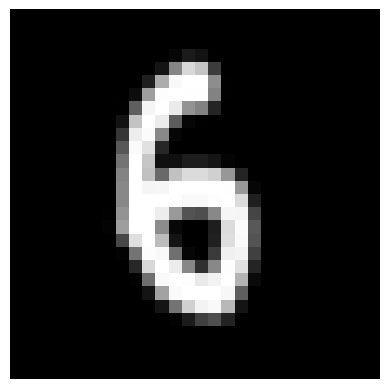

Predicted Digit: 6


In [7]:
def process_image(image_path):
    img = Image.open(image_path).convert('L')
    img = Image.eval(img, lambda x: 255 - x)
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    img = transform(img)
    img = img.unsqueeze(0)
    return img

uploaded = files.upload()

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")
    img_tensor = process_image(filename)

    plt.imshow(img_tensor.squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

    model.eval()
    with torch.no_grad():
        output = model(img_tensor)
        _, pred = torch.max(output, 1)
        print(f"Predicted Digit: {pred.item()}")

1. def process_image(image_path): = Preparing image for the model  
2. img = Image.open(image_path).convert('L') = open image and convert it to grayscale  
3. img = Image.eval(img, lambda x: 255 - x) = invert image colors so digits are white on black  
4. transform = transforms.Compose = create a sequence of transformations to prepare the image  
  * transforms.Resize((28, 28)) = resize the image to 28×28 pixels  
  * transforms.ToTensor() = convert the image to a PyTorch tensor  
  * transforms.Normalize((0.5,), (0.5,)) = normalize pixel values to range [-1, 1]
    
  * img = transform(img) = apply transformations to image  
  * img = img.unsqueeze(0) = add batch dimension so model sees it as one sample  
  * return img = return the processed image tensor  

5. uploaded = files.upload() = open a file upload dialog in Colab for user to select an image  

 * for filename in uploaded.keys(): = loop over each uploaded file  
 * print.. = display file name  
 * img_tensor = process_image(filename) = process uploaded image for model input  

 * plt.imshow(img_tensor.squeeze(), cmap='gray') = show processed image without the batch dimension in grayscale  
 * plt.axis('off') = hide axis for cleaner display  
 * plt.show() = display image  

 * model.eval() = set model to evaluation mode  
 * with torch.no_grad(): = disable gradient calculation for faster inference  
 * output = model(img_tensor) = pass img through model to get predictions
 * _, pred = torch.max(output, 1) = get the index of the highest score (predicted digit)
 * print.. = print predicted digit as num